In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Combining lats and lngs in a zip
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
# Converting from zip to list
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

In [6]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | saldanha
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | progreso
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | santa isabel do rio negro
Processing Record 7 of Set 1 | oistins
Processing Record 8 of Set 1 | ahuatempan
Processing Record 9 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | soroca
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | kutum
Processing Record 18 of Set 1 | salalah
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | bethel
Process

Processing Record 34 of Set 4 | general roca
Processing Record 35 of Set 4 | san quintin
Processing Record 36 of Set 4 | honningsvag
Processing Record 37 of Set 4 | guarapari
Processing Record 38 of Set 4 | pacific grove
Processing Record 39 of Set 4 | lovozero
Processing Record 40 of Set 4 | leningradskiy
Processing Record 41 of Set 4 | bestobe
Processing Record 42 of Set 4 | mayumba
Processing Record 43 of Set 4 | phan rang
City not found. Skipping...
Processing Record 44 of Set 4 | carnarvon
Processing Record 45 of Set 4 | talaya
Processing Record 46 of Set 4 | lethem
Processing Record 47 of Set 4 | souillac
Processing Record 48 of Set 4 | kargasok
Processing Record 49 of Set 4 | akhty
Processing Record 50 of Set 4 | tasiilaq
Processing Record 1 of Set 5 | san vicente
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | mount isa
Processing Record 4 of Set 5 | avera
Processing Record 5 of Set 5 | lagoa
Processing Record 6 of Set 5 | palabuhanratu
City not found. Ski

Processing Record 23 of Set 8 | ribeira grande
Processing Record 24 of Set 8 | laurencekirk
Processing Record 25 of Set 8 | guantanamo
Processing Record 26 of Set 8 | novopavlovka
Processing Record 27 of Set 8 | opotiki
Processing Record 28 of Set 8 | timizart
Processing Record 29 of Set 8 | kudahuvadhoo
Processing Record 30 of Set 8 | yulara
Processing Record 31 of Set 8 | nador
Processing Record 32 of Set 8 | yartsevo
Processing Record 33 of Set 8 | shilka
Processing Record 34 of Set 8 | russell
Processing Record 35 of Set 8 | neuquen
Processing Record 36 of Set 8 | grand gaube
Processing Record 37 of Set 8 | north bend
Processing Record 38 of Set 8 | nambutalai
Processing Record 39 of Set 8 | totness
Processing Record 40 of Set 8 | sterling
Processing Record 41 of Set 8 | magadan
Processing Record 42 of Set 8 | constitucion
Processing Record 43 of Set 8 | amazar
Processing Record 44 of Set 8 | viligili
City not found. Skipping...
Processing Record 45 of Set 8 | galle
Processing Reco

KeyboardInterrupt: 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,70.21,94,20,3.44,MU,2021-10-30 22:24:52
1,Saldanha,-33.0117,17.9442,59.05,87,30,9.66,ZA,2021-10-30 22:25:58
2,Cherskiy,68.7500,161.3000,-0.92,98,100,5.95,RU,2021-10-30 22:25:58
3,Progreso,21.2833,-89.6667,82.51,54,13,10.29,MX,2021-10-30 22:22:43
4,Tiksi,71.6872,128.8694,0.37,94,97,8.99,RU,2021-10-30 22:25:59
5,Santa Isabel Do Rio Negro,-0.4139,-65.0192,82.13,71,85,1.45,BR,2021-10-30 22:25:59
6,Oistins,13.0667,-59.5333,80.69,74,20,13.80,BB,2021-10-30 22:25:59
7,Ahuatempan,18.4167,-98.0167,72.82,47,18,6.46,MX,2021-10-30 22:25:59
8,Codrington,-38.2667,141.9667,51.12,80,3,7.00,AU,2021-10-30 22:26:00
9,Rikitea,-23.1203,-134.9692,75.02,85,80,21.12,PF,2021-10-30 22:24:36


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [4]:
# Importing city_data from CSV to make testing quicker
city_data_df = pd.read_csv('weather_data/cities.csv')

In [5]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

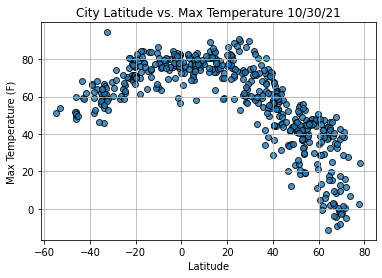

In [7]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

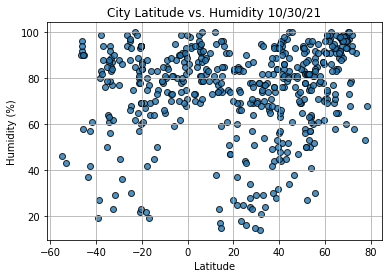

In [8]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

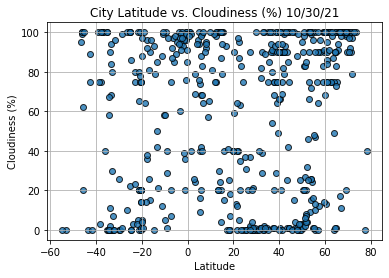

In [9]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

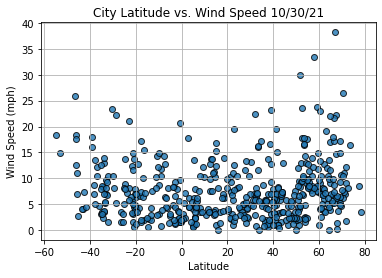

In [10]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()